In [1]:
# https://www.analyticsvidhya.com/blog/2020/10/all-about-decision-tree-from-scratch-with-python-implementation/

## Build Decision Tree Classifier

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import export_text
from sklearn import tree
import matplotlib.pyplot as plt

In [3]:
columns = ['Blood Pressure', 'diabetes', 'smoking', 'hypertension', 'heart disease']
data = [
    [0, 1, 0, 1, 0],
    [1, 0, 1, 0, 1],
    [1, 1, 0, 0, 1],
    [0, 0, 1, 1, 0],
    [1, 1, 1, 0, 1],
    [0, 1, 1, 0, 0],
    [1, 0, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [1, 1, 0, 1, 1],
    [0, 1, 1, 1, 0],
    [1, 1, 1, 1, 1],
    [0, 0, 1, 0, 0],
    [1, 0, 0, 0, 1],
    [1, 1, 0, 0, 1],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [1, 1, 1, 0, 1],
    [0, 1, 1, 0, 0],
    [1, 0, 0, 1, 0],
    [0, 0, 1, 1, 0]
]

In [4]:
df = pd.DataFrame(data, columns=columns)
df.head()

,Blood Pressure,diabetes,smoking,hypertension,heart disease
0,0,1,0,1,0
1,1,0,1,0,1
2,1,1,0,0,1
3,0,0,1,1,0
4,1,1,1,0,1


In [5]:
df_symptoms_X = df.iloc[:,:-1]
df_symptoms_X.head()

,Blood Pressure,diabetes,smoking,hypertension
0,0,1,0,1
1,1,0,1,0
2,1,1,0,0
3,0,0,1,1
4,1,1,1,0


In [6]:
df_target_Y = df[['heart disease']]
df_target_Y.head()

,heart disease
0,0
1,1
2,1
3,0
4,1


In [7]:
CLF = DecisionTreeClassifier()
x_train, x_test, y_train, y_test = train_test_split(df_symptoms_X, df_target_Y)

CLF = CLF.fit(x_train, y_train)
Y_predicted = CLF.predict(x_test)
print("Accuracy = ", metrics.accuracy_score(y_test, Y_predicted))

Accuracy =  1.0


In [8]:
print(export_text(CLF, feature_names=columns[:-1]))

|--- Blood Pressure <= 0.50
|   |--- class: 0
|--- Blood Pressure >  0.50
|   |--- hypertension <= 0.50
|   |   |--- class: 1
|   |--- hypertension >  0.50
|   |   |--- diabetes <= 0.50
|   |   |   |--- class: 0
|   |   |--- diabetes >  0.50
|   |   |   |--- class: 1



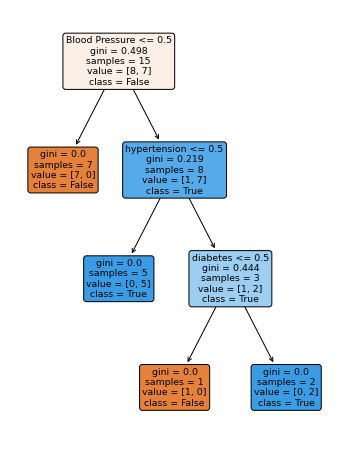

In [9]:

fig = plt.figure(figsize=(6,8))

feature_names = df.columns[:4]
target_names = list(map(lambda x : f"False" if x==0 else f"True", df['heart disease'].unique().tolist()))

_ = tree.plot_tree(CLF, 
                   feature_names = feature_names,  
                   class_names = target_names,
                   filled=True,
                   rounded = True)

### Decision Tree with Lung cancer dataset..

In [10]:
df = pd.read_csv("lung_cancer.csv")
print(df.shape)
df.head()

(309, 16)


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


### Pre-processing data
#### 2 = Yes, 1 = No

In [11]:
# df['year'] = np.where(df["year"] > 2016, 1, 0)
for each in df.columns[2:-1]:
    df[each] = np.where(df[each] == 2, 1, 0)
    
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO


In [12]:
df_symptoms_X = df.iloc[:,1:-1]
df_symptoms_X.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,69,0,1,1,0,0,1,0,1,1,1,1,1,1
1,74,1,0,0,0,1,1,1,0,0,0,1,1,1
2,59,0,0,0,1,0,1,0,1,0,1,1,0,1
3,63,1,1,1,0,0,0,0,0,1,0,0,1,1
4,63,0,1,0,0,0,0,0,1,0,1,1,0,0


In [13]:
df_target_Y = df[['LUNG_CANCER']]
df_target_Y.head()

,LUNG_CANCER
0,YES
1,YES
2,NO
3,NO
4,NO


In [14]:
CLF = DecisionTreeClassifier()
x_train, x_test, y_train, y_test = train_test_split(df_symptoms_X, df_target_Y)

CLF = CLF.fit(x_train, y_train)
Y_predicted = CLF.predict(x_test)
print("Accuracy = ", metrics.accuracy_score(y_test, Y_predicted))

Accuracy =  0.9487179487179487


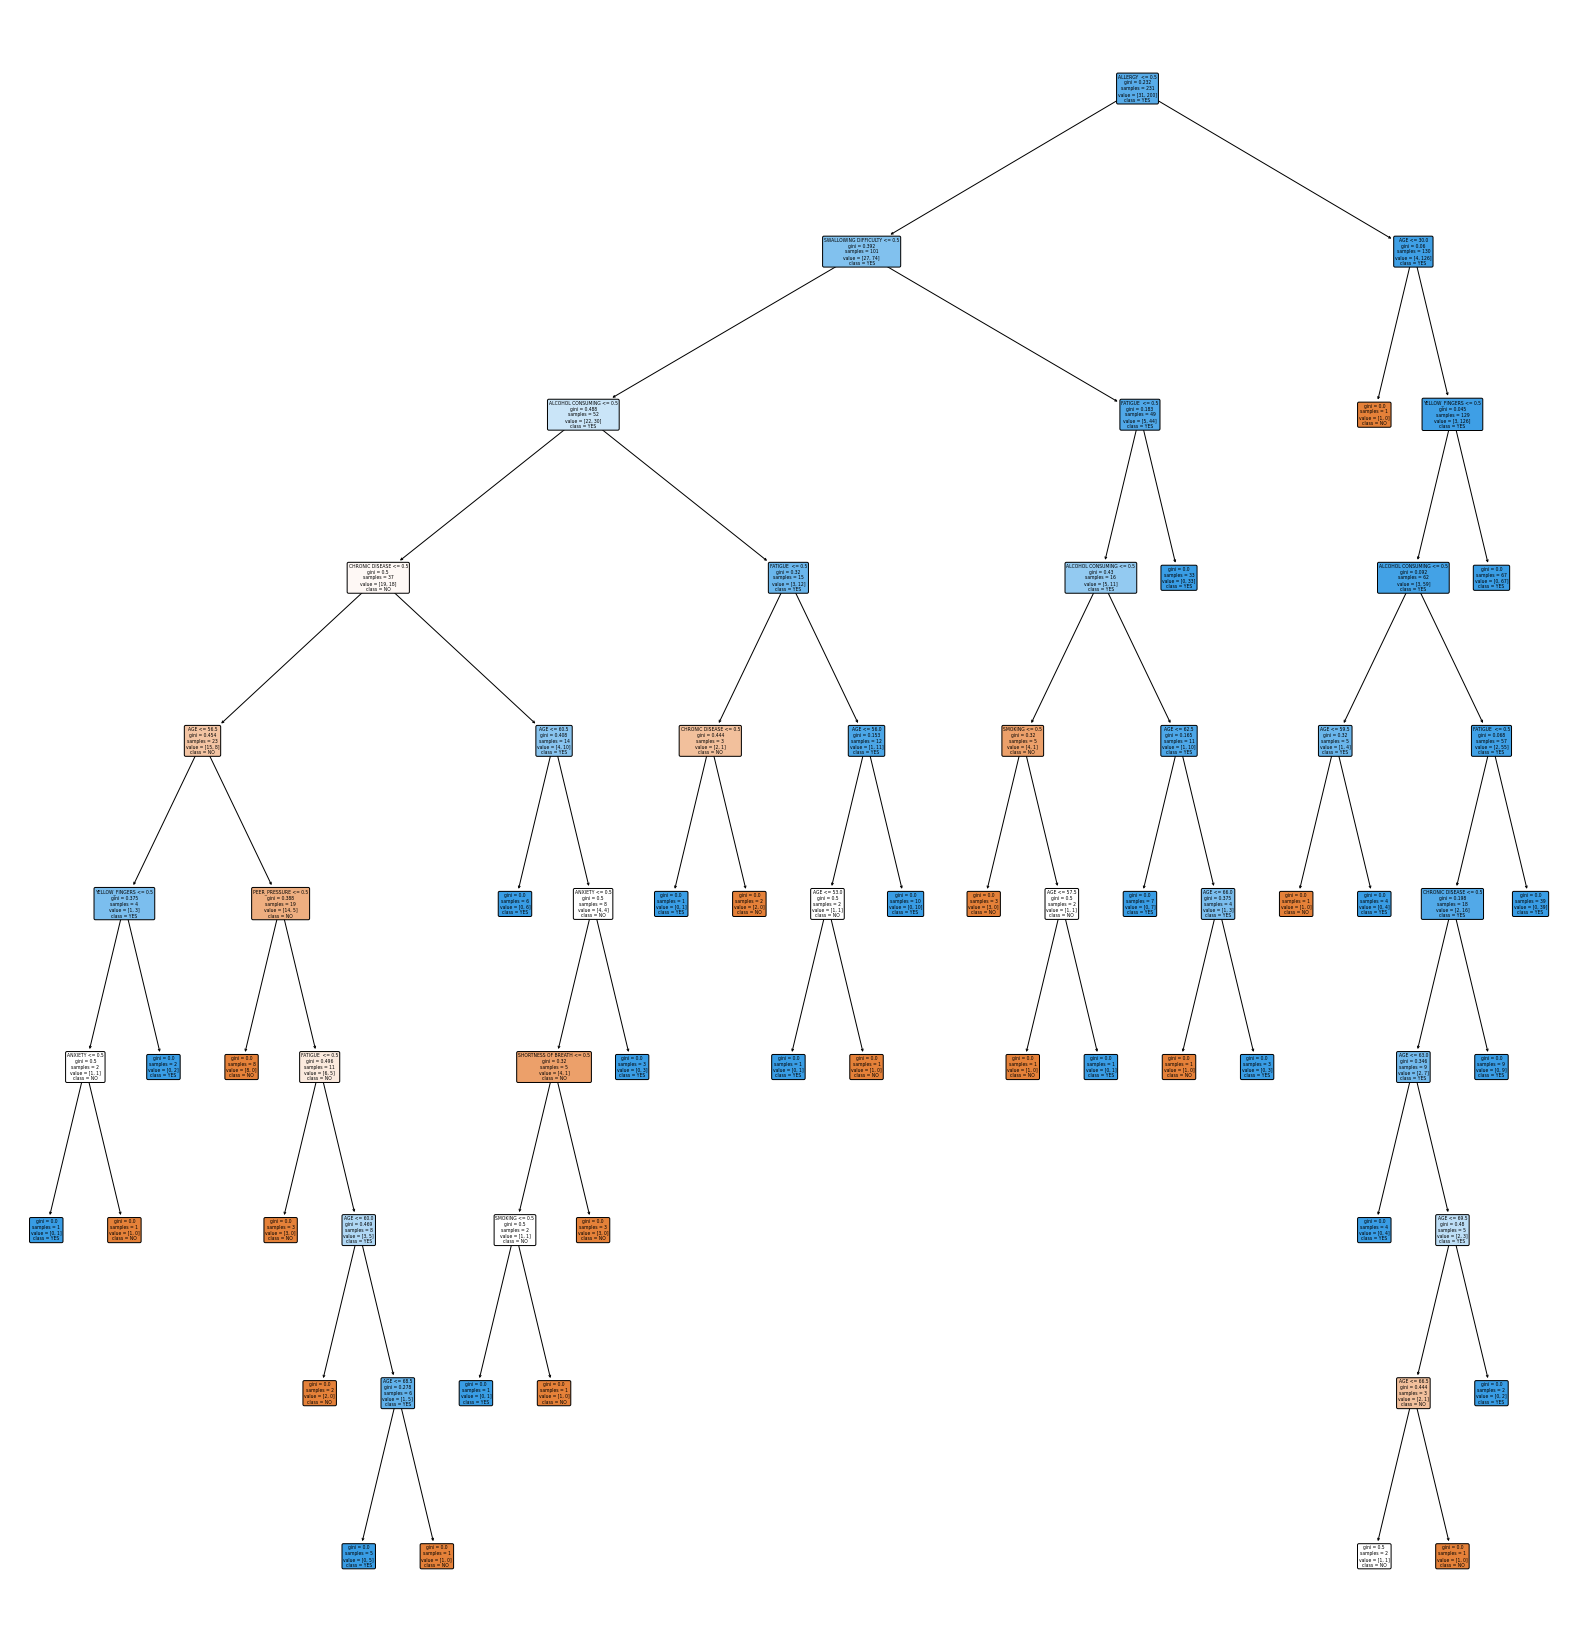

In [22]:

fig = plt.figure(figsize=(28,30))

feature_names = df.columns[1:-1]
target_names = sorted(df['LUNG_CANCER'].unique().tolist())

_ = tree.plot_tree(CLF, 
                   feature_names = feature_names,  
                   class_names = target_names,
                   filled=True,
                   rounded = True)

In [16]:
print(export_text(CLF,feature_names=list(feature_names)))

|--- ALLERGY  <= 0.50
|   |--- SWALLOWING DIFFICULTY <= 0.50
|   |   |--- ALCOHOL CONSUMING <= 0.50
|   |   |   |--- CHRONIC DISEASE <= 0.50
|   |   |   |   |--- AGE <= 56.50
|   |   |   |   |   |--- YELLOW_FINGERS <= 0.50
|   |   |   |   |   |   |--- ANXIETY <= 0.50
|   |   |   |   |   |   |   |--- class: YES
|   |   |   |   |   |   |--- ANXIETY >  0.50
|   |   |   |   |   |   |   |--- class: NO
|   |   |   |   |   |--- YELLOW_FINGERS >  0.50
|   |   |   |   |   |   |--- class: YES
|   |   |   |   |--- AGE >  56.50
|   |   |   |   |   |--- PEER_PRESSURE <= 0.50
|   |   |   |   |   |   |--- class: NO
|   |   |   |   |   |--- PEER_PRESSURE >  0.50
|   |   |   |   |   |   |--- FATIGUE  <= 0.50
|   |   |   |   |   |   |   |--- class: NO
|   |   |   |   |   |   |--- FATIGUE  >  0.50
|   |   |   |   |   |   |   |--- AGE <= 60.00
|   |   |   |   |   |   |   |   |--- class: NO
|   |   |   |   |   |   |   |--- AGE >  60.00
|   |   |   |   |   |   |   |   |--- AGE <= 68.50
|   |   |   |   |   |